In [5]:
library(tidyverse)
library(fable)
library(tsibble)
library(readxl)

In [30]:
read_csv("MAF3074N-12012024_103744.csv")
read_xlsx("MAF3074N-12012024_103744.xlsx")

Rows: 1064 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): country, indicator
dbl (18): 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
data(world_bank_pop, package = "tidyr")
pop <- world_bank_pop

In [6]:
?read_xlsx

read_excel {readxl},R Documentation
path,Path to the xls/xlsx file.
sheet,"Sheet to read. Either a string (the name of a sheet), or an integer (the position of the sheet). Ignored if the sheet is specified via range. If neither argument specifies the sheet, defaults to the first sheet."
range,"A cell range to read from, as described in cell-specification. Includes typical Excel ranges like ""B3:D87"", possibly including the sheet name like ""Budget!B2:G14"", and more. Interpreted strictly, even if the range forces the inclusion of leading or trailing empty rows or columns. Takes precedence over skip, n_max and sheet."
col_names,"TRUE to use the first row as column names, FALSE to get default names, or a character vector giving a name for each column. If user provides col_types as a vector, col_names can have one entry per column, i.e. have the same length as col_types, or one entry per unskipped column."
col_types,"Either NULL to guess all from the spreadsheet or a character vector containing one entry per column from these options: ""skip"", ""guess"", ""logical"", ""numeric"", ""date"", ""text"" or ""list"". If exactly one col_type is specified, it will be recycled. The content of a cell in a skipped column is never read and that column will not appear in the data frame output. A list cell loads a column as a list of length 1 vectors, which are typed using the type guessing logic from col_types = NULL, but on a cell-by-cell basis."
na,"Character vector of strings to interpret as missing values. By default, readxl treats blank cells as missing data."
trim_ws,Should leading and trailing whitespace be trimmed?
skip,"Minimum number of rows to skip before reading anything, be it column names or data. Leading empty rows are automatically skipped, so this is a lower bound. Ignored if range is given."
n_max,"Maximum number of data rows to read. Trailing empty rows are automatically skipped, so this is an upper bound on the number of rows in the returned tibble. Ignored if range is given."
guess_max,Maximum number of data rows to use for guessing column types.


In [33]:
head(pop)

country,indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABW,SP.URB.TOTL,4.162500e+04,4.202500e+04,4.219400e+04,4.227700e+04,4.231700e+04,4.239900e+04,4.255500e+04,4.272900e+04,4.290600e+04,4.307900e+04,4.320600e+04,4.349300e+04,4.386400e+04,4.422800e+04,4.458800e+04,4.494300e+04,4.529700e+04,4.564800e+04
ABW,SP.URB.GROW,1.664222e+00,9.563731e-01,4.013352e-01,1.965172e-01,9.456936e-02,1.935880e-01,3.672580e-01,4.080490e-01,4.133830e-01,4.023963e-01,2.943735e-01,6.620631e-01,8.493932e-01,8.264135e-01,8.106692e-01,7.930256e-01,7.845785e-01,7.718989e-01
ABW,SP.POP.TOTL,8.910100e+04,9.069100e+04,9.178100e+04,9.270100e+04,9.354000e+04,9.448300e+04,9.560600e+04,9.678700e+04,9.799600e+04,9.921200e+04,1.003410e+05,1.012880e+05,1.021120e+05,1.028800e+05,1.035940e+05,1.042570e+05,1.048740e+05,1.054390e+05
ABW,SP.POP.GROW,2.539234e+00,1.768757e+00,1.194718e+00,9.973955e-01,9.009892e-01,1.003077e+00,1.181566e+00,1.227711e+00,1.241397e+00,1.233231e+00,1.131541e+00,9.393559e-01,8.102306e-01,7.493010e-01,6.916153e-01,6.379592e-01,5.900625e-01,5.372957e-01
AFE,SP.URB.TOTL,1.155517e+08,1.197755e+08,1.242275e+08,1.288340e+08,1.336475e+08,1.387456e+08,1.440267e+08,1.492313e+08,1.553838e+08,1.617762e+08,1.684561e+08,1.754157e+08,1.825587e+08,1.901087e+08,1.980733e+08,2.065563e+08,2.150833e+08,2.237321e+08
AFE,SP.URB.GROW,3.602262e+00,3.655377e+00,3.716958e+00,3.708082e+00,3.736205e+00,3.814604e+00,3.806357e+00,3.613608e+00,4.122776e+00,4.113937e+00,4.129107e+00,4.131389e+00,4.072096e+00,4.135611e+00,4.189539e+00,4.282732e+00,4.128191e+00,4.021134e+00


In [43]:
pop_tidy = pop %>% 
  # i)
  pivot_longer(cols = -c(country, indicator),
               names_to = "year", values_to = "value") %>%
  # ii)
  pivot_wider(names_from = indicator,
              values_from = value) %>%
  # iii)
  select(country,year,contains("TOTL")) %>% 
  # iv)
  rename(urban_pop = SP.URB.TOTL,total_pop = SP.POP.TOTL)  %>% 
  #v)
  mutate(rural_pop_pct = (1 - urban_pop / total_pop)*100,
         country = as_factor(country),
         year = as.integer(year)
         ) %>% 
  # vi)
  filter(country %in% c("MEX","BRA","ARG")) %>%
    # vii)
    as_tsibble(key = country, index = year)

In [10]:
pop_tidy <- pop %>% 
  # i)
  pivot_longer(cols = -c(country, indicator),
               names_to = "year", values_to = "value") %>%
  # ii)
  pivot_wider(names_from = indicator,
              values_from = value) %>% 
  # iii)
  select(country,year,contains("TOTL")) %>% 
  # iv)
  rename(urban_pop = SP.URB.TOTL,total_pop = SP.POP.TOTL) %>% 
  #v)
  mutate(rural_pop_pct = (1 - urban_pop / total_pop)*100,
         country = as_factor(country),
         year = as.integer(year)
         ) %>% 
  # vi)
  filter(country %in% c("MEX","BRA","ARG")) %>% 
  #vii)
  as_tsibble(key = country, index = year)

head(pop_tidy)

country,year,urban_pop,total_pop,rural_pop_pct
<fct>,<int>,<dbl>,<dbl>,<dbl>
ARG,2000,33045629,37070774,10.858001
ARG,2001,33480950,37480493,10.670999
ARG,2002,33910889,37885028,10.489999
ARG,2003,34330154,38278164,10.314000
ARG,2004,34747780,38668796,10.140000
ARG,2005,35175563,39070501,9.968999


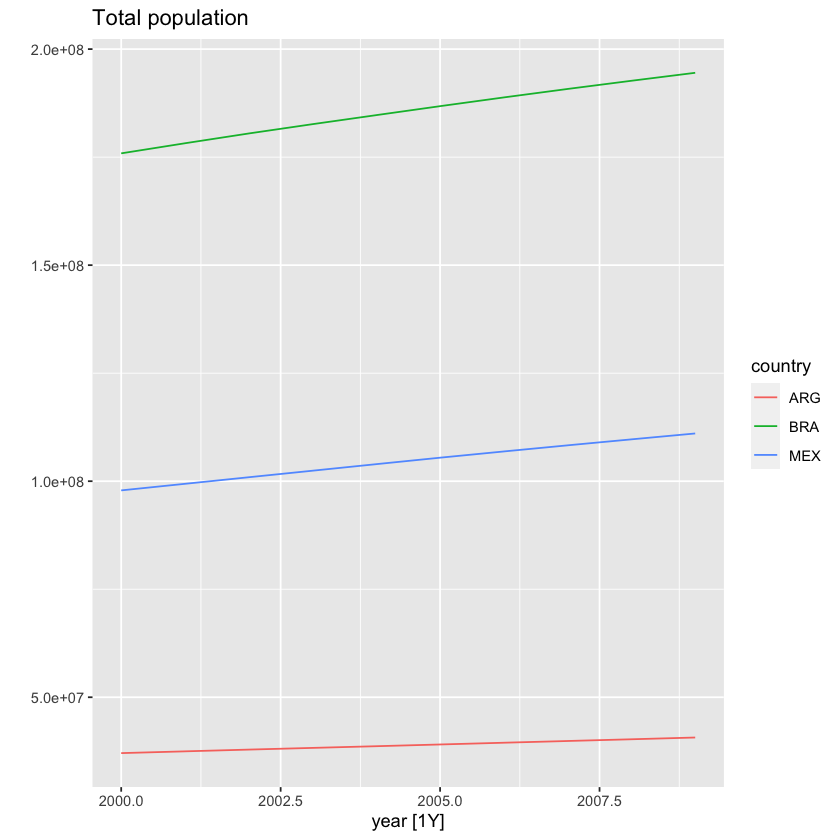

In [44]:
pop_train <- pop_tidy %>% 
  filter(year <= 2009)
pop_query <- pop_tidy %>% 
  filter(year > 2009 & year <= 2013)
pop_train_query <- pop_tidy %>% 
  filter(year <= 2013)
# Total population plot
pop_train %>% 
  autoplot(total_pop) + ggtitle("Total population") + 
  ylab("")

In [12]:
library(DataExplorer)

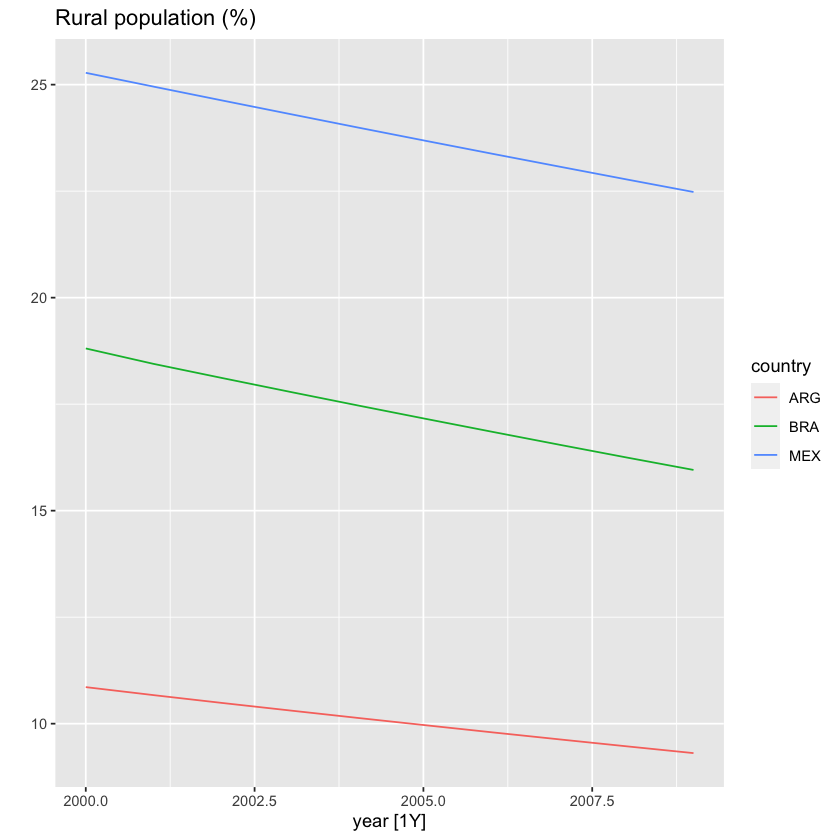

In [45]:
pop_train %>%
  autoplot(rural_pop_pct) + ggtitle("Rural population (%)") +
  ylab("")

In [49]:
pop_fit <- pop_train %>% 
  model('RW w/ drift' = RW(rural_pop_pct ~ drift()),
        'TSLM w/ trend' = TSLM(rural_pop_pct ~ trend()),
        ETS = ETS(rural_pop_pct ~ error("A") + trend("A") + season("N") )
        )
tidy(pop_fit)

country,.model,term,estimate,std.error,statistic,p.value
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARG,RW w/ drift,b,-0.1721112254,0.002781239,-61.88294,5.168774e-12
ARG,TSLM w/ trend,(Intercept),11.0101996998,0.008082695,1362.19410,9.447118e-23
ARG,TSLM w/ trend,trend(),-0.1717635992,0.001302644,-131.85764,1.223648e-14
ARG,ETS,alpha,0.1913054726,NA,NA,NA
ARG,ETS,beta,0.0001000047,NA,NA,NA
ARG,ETS,l[0],11.0118811216,NA,NA,NA
ARG,ETS,b[0],-0.1717899984,NA,NA,NA
BRA,RW w/ drift,b,-0.3168888794,0.006494511,-48.79334,3.444205e-11
BRA,TSLM w/ trend,(Intercept),19.0770666875,0.016703910,1142.07191,3.869553e-22


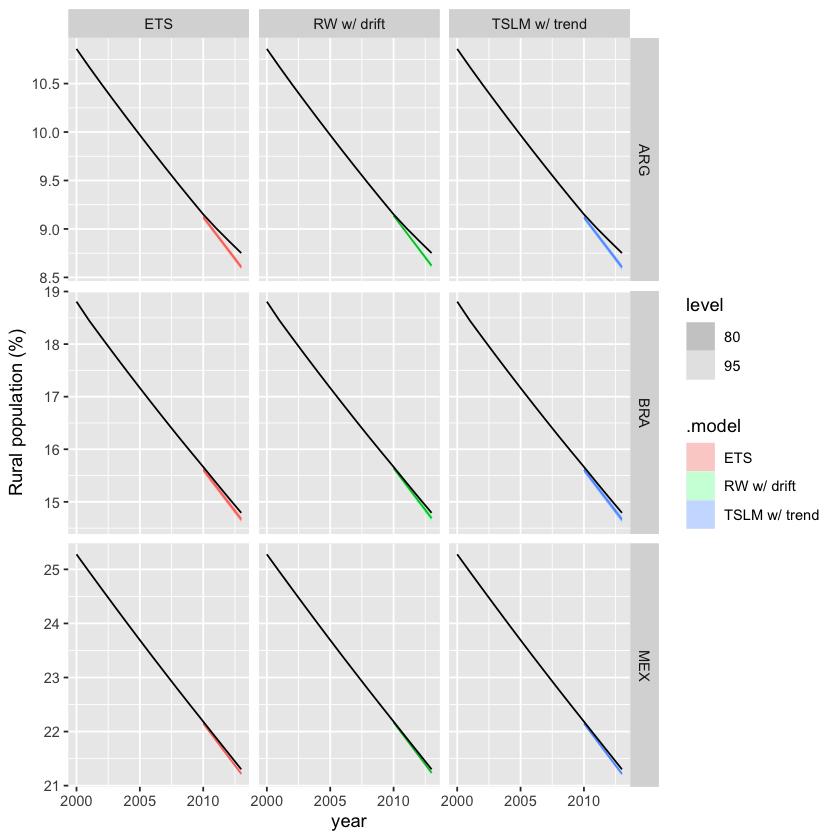

In [51]:
pop_fcst <- pop_fit %>% 
  forecast(h = "4 years")

pop_fcst %>% 
  autoplot(pop_train_query) +
  facet_grid(cols = vars(.model), rows = vars(country), scales = "free_y") + 
  guides(color = FALSE) +
  ylab("Rural population (%)")

In [52]:
pop_fcst

country,.model,year,rural_pop_pct,.mean
<fct>,<chr>,<dbl>,<dist>,<dbl>
ARG,RW w/ drift,2010,"N(9.1, 7.7e-05)",9.136889
ARG,RW w/ drift,2011,"N(9, 0.00017)",8.964777
ARG,RW w/ drift,2012,"N(8.8, 0.00028)",8.792666
ARG,RW w/ drift,2013,"N(8.6, 4e-04)",8.620555
ARG,TSLM w/ trend,2010,"N(9.1, 0.00021)",9.120800
ARG,TSLM w/ trend,2011,"N(8.9, 0.00023)",8.949037
ARG,TSLM w/ trend,2012,"N(8.8, 0.00025)",8.777273
ARG,TSLM w/ trend,2013,"N(8.6, 0.00028)",8.605509
ARG,ETS,2010,"N(9.1, 0.00021)",9.122218


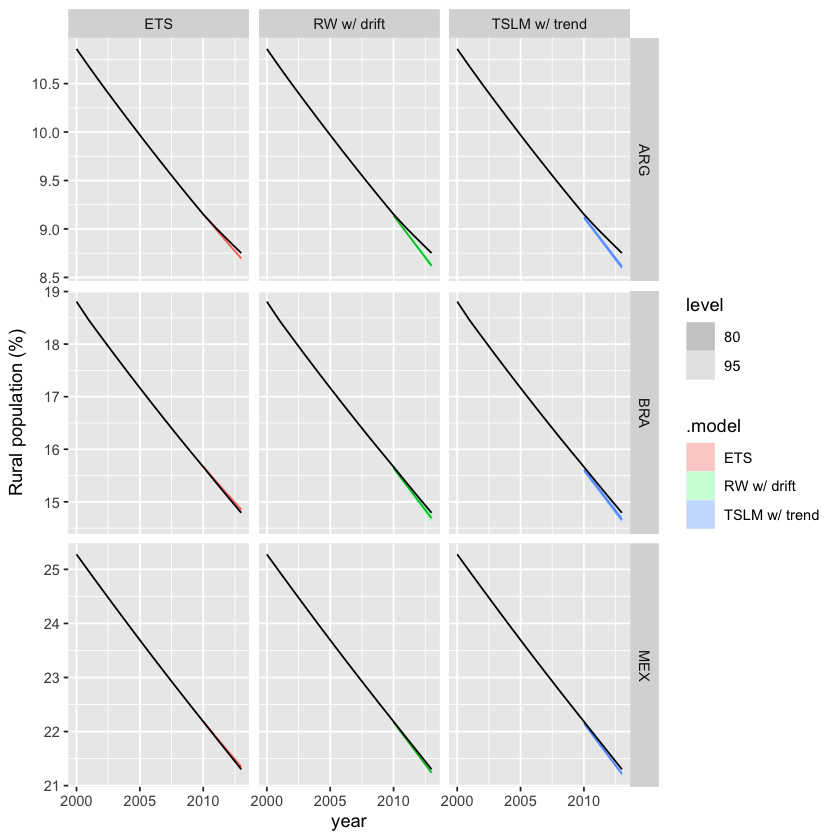

In [16]:
pop_fit2 <- pop_train %>% 
  model(`RW w/ drift` = RW(rural_pop_pct ~ drift()),
        `TSLM w/ trend` = TSLM(rural_pop_pct ~ trend()),
        ETS = ETS(rural_pop_pct ~ error("A") + trend("Ad") + season("N") )
        )
pop_fcst2 <- pop_fit2 %>% 
  forecast(h = "4 years") 

pop_fcst2 %>% 
  autoplot(pop_train_query) +
  facet_grid(cols = vars(.model), rows = vars(country), scales = "free_y") + 
  guides(color = FALSE) +
  ylab("Rural population (%)")

In [17]:
accuracy(pop_fcst2,pop_train_query) %>% 
  arrange(country, MAPE)

.model,country,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ETS,ARG,Test,0.02572146,0.03335293,0.02601719,0.2914695,0.2947011,0.15116500,0.19358498,0.2635985
RW w/ drift,ARG,Test,0.06902778,0.08172143,0.06902778,0.7797675,0.7797675,0.40106496,0.47432239,0.2558387
TSLM w/ trend,ARG,Test,0.08459495,0.09505846,0.08459495,0.9537220,0.9537220,0.49151326,0.55173232,0.2558626
ETS,BRA,Test,-0.03409722,0.03947590,0.03409722,-0.2268477,0.2268477,0.10759994,0.12436455,0.2556870
RW w/ drift,BRA,Test,0.06172238,0.06802982,0.06172238,0.4095842,0.4095842,0.19477610,0.21432059,0.2422277
TSLM w/ trend,BRA,Test,0.08881238,0.09275664,0.08881238,0.5873301,0.5873301,0.28026347,0.29221975,0.2414074
ETS,MEX,Test,-0.02228009,0.02723306,0.02228009,-0.1035769,0.1035769,0.07166573,0.08756795,0.2320368
RW w/ drift,MEX,Test,0.03972290,0.04370210,0.03972290,0.1840086,0.1840086,0.12777197,0.14052418,0.2556081
TSLM w/ trend,MEX,Test,0.05894594,0.06172228,0.05894594,0.2724470,0.2724470,0.18960449,0.19846808,0.2555849


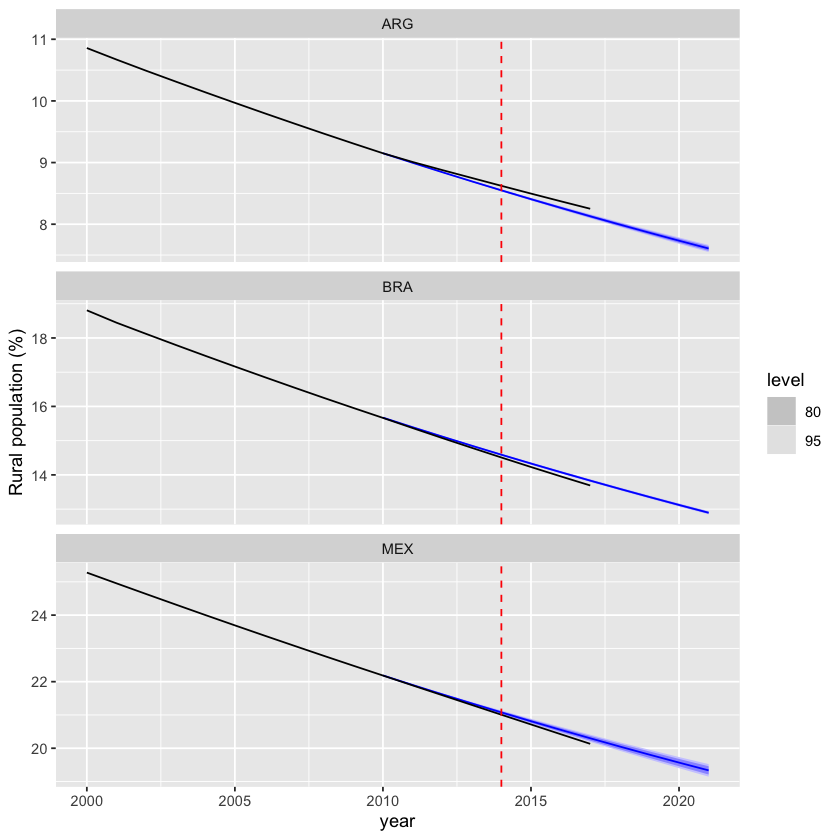

In [53]:
pop_train %>% 
  model(ETS = ETS(rural_pop_pct ~ error("A") + trend("Ad") + season("N") )
        ) %>% 
  forecast(h = "12 years") %>% 
  autoplot(pop_tidy) + 
  geom_vline(xintercept = 2014, linetype ="dashed", color = "red") +
  ylab("Rural population (%)") 

In [19]:
library(DataExplorer)

In [26]:
DataExplorer::create_report(select(filter(pop_tidy, country=="ARG"), rural_pop_pct))



processing file: report.rmd



1/42                                 
2/42 [global_options]                
3/42                                 
4/42 [introduce]                     
5/42                                 
6/42 [plot_intro]                    
7/42                                 
8/42 [data_structure]                
9/42                                 
10/42 [missing_profile]               
11/42                                 
12/42 [univariate_distribution_header]
13/42                                 
14/42 [plot_histogram]                
15/42                                 
16/42 [plot_density]                  
17/42                                 
18/42 [plot_frequency_bar]            
19/42                                 
20/42 [plot_response_bar]             
21/42                                 
22/42 [plot_with_bar]                 
23/42                                 
24/42 [plot_normal_qq]                
25/42                                 
26/42 [plot_response_qq]          

output file: /Users/danielnuno/Documents/GitHub/time_series_s2024/Intro a R/report.knit.md




/Users/danielnuno/anaconda3/bin/pandoc +RTS -K512m -RTS '/Users/danielnuno/Documents/GitHub/time_series_s2024/Intro a R/report.knit.md' --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc21355ce4ffc8.html --lua-filter /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --table-of-contents --toc-depth 6 --template /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=yeti --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/lh/7ggz3y952mz5mp4rxcnrx5dw0000gn/T//Rtmp4uOUEX/rmarkdown-str21357cab7651.html 



Output created: report.html



In [28]:
select(filter(pop_tidy, country=="ARG"), rural_pop_pct)

rural_pop_pct,year
<dbl>,<int>
10.858001,2000
10.670999,2001
10.489999,2002
10.314000,2003
10.140000,2004
9.968999,2005
9.799999,2006
9.634001,2007
9.470000,2008


In [ ]:
?rmarkdown::pandoc_available

In [ ]:
pandoc_version

In [ ]:
pandoc_available()

In [ ]:
library(rmarkdown)

In [ ]:
pandoc_available()

In [ ]:
conda install conda-forge::pandoc

In [21]:
pop_tidy$rural_pop_pct

[1] 10.858001 10.670999 10.489999 10.314000 10.140000  9.968999  9.799999
 [8]  9.634001  9.470000  9.309000  9.150999  9.009999  8.879000  8.751000
[15]  8.623000  8.497000  8.373001  8.250999 18.808000 18.447000 18.120000
[22] 17.797000 17.479000 17.166000 16.857000 16.552000 16.251000 15.956000
[29] 15.665000 15.369000 15.077000 14.791000 14.508000 14.230000 13.958000
[36] 13.691000 25.278000 24.955000 24.635000 24.318000 24.003000 23.692000
[43] 23.384000 23.080000 22.778000 22.480000 22.185000 21.889000 21.595000
[50] 21.301000 21.007000 20.715000 20.423000 20.133000

In [22]:
select(pop_tidy, rural_pop_pct, country, year)

rural_pop_pct,country,year
<dbl>,<fct>,<int>
10.858001,ARG,2000
10.670999,ARG,2001
10.489999,ARG,2002
10.314000,ARG,2003
10.140000,ARG,2004
9.968999,ARG,2005
9.799999,ARG,2006
9.634001,ARG,2007
9.470000,ARG,2008
